In [95]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [96]:
data = pd.read_csv('Social_Network_Ads.csv')

In [97]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [98]:
data.shape 

(400, 5)

In [99]:
data['Purchased'].value_counts() 

0    257
1    143
Name: Purchased, dtype: int64

In [100]:
data['Purchased'].value_counts(normalize=True)

0    0.6425
1    0.3575
Name: Purchased, dtype: float64

In [101]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

# one hot encoding 

In [102]:
# this is done so as to convert the string data into numerical form

In [103]:
data = pd.get_dummies(data)

In [104]:
data.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


# split the dataset 

In [105]:
# into features and target
# train - test set

In [106]:
# here we take y as the output and all others as the x (we drop the user id column because it is not relevent) 
x = data.drop(['User ID','Purchased'], axis=1)
y = data['Purchased']

In [107]:
from sklearn.model_selection import train_test_split
# assigning values
x_train, x_test ,y_train, y_test = train_test_split(x,y , random_state=42, test_size=0.2)

# Logistic regression (LR)

In [108]:
from sklearn.linear_model import LogisticRegression
# we have to create an instance of the model and store it to a variable 
log_model = LogisticRegression()

In [109]:
# fitting it into x_train and y_train
log_model.fit(x_train, y_train)
# predict the values using this model created 
y_pred = log_model.predict(x_test)

In [110]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [111]:
print("Accuracy score is:", accuracy_score(y_test, y_pred))
print("precision score is:", precision_score(y_test, y_pred))
print("recall score is:", recall_score(y_test, y_pred)) 
print("f1 score is:", f1_score(y_test, y_pred))     

Accuracy score is: 0.65
precision score is: 0.0
recall score is: 0.0
f1 score is: 0.0


C:\Users\ssaai\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [112]:
confusion_matrix(y_test, y_pred)

array([[52,  0],
       [28,  0]], dtype=int64)

# K Nearest Neighbors (KNN)

In [113]:
#improt the model
from sklearn.neighbors import KNeighborsClassifier

In [114]:
# find the optimal k vaule; for this we have to create the models with varied k values 
#make an empty list 
acc_values = []
# taking some values between 3 to 15 to a variable
neighbors = np.arange(3,15)


In [115]:
# creating a loop 
# for such models ...as seen above ,first we assign a variable to the instance, 
#then we fit the variable with x and y train, then we predict the values 
# then we look at things like accuracy etc 

In [116]:
for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k , metric = 'minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    acc = accuracy_score (y_pred, y_test)
    acc_values.append(acc)

In [117]:
acc_values

[0.8,
 0.8,
 0.825,
 0.775,
 0.8125,
 0.775,
 0.7875,
 0.775,
 0.8,
 0.775,
 0.75,
 0.7625]

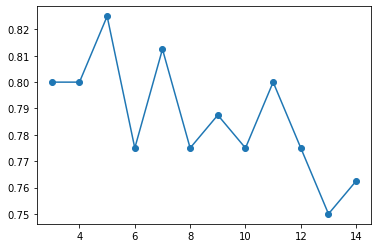

In [118]:
plt.plot(neighbors, acc_values , 'o-')

In [119]:
# y axis is the accuracy an x axis is the k value 
# it is observed that the maximum accuracy is for the k value of 5 

In [120]:
classifier = KNeighborsClassifier(n_neighbors = 5 , metric = 'minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [121]:
print("Accuracy score is:", accuracy_score(y_test, y_pred))
print("precision score is:", precision_score(y_test, y_pred))
print("recall score is:", recall_score(y_test, y_pred)) 
print("f1 score is:", f1_score(y_test, y_pred))    

Accuracy score is: 0.825
precision score is: 0.7692307692307693
recall score is: 0.7142857142857143
f1 score is: 0.7407407407407408


In [122]:
confusion_matrix(y_test, y_pred)

array([[46,  6],
       [ 8, 20]], dtype=int64)

In [123]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500,0.510000,0.490000
std,7.165832e+04,10.482877,34096.960282,0.479864,0.500526,0.500526
min,1.556669e+07,18.000000,15000.000000,0.000000,0.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000,0.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000,1.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000,1.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000,1.000000,1.000000


# Standard scaling

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [86]:
log_model = LogisticRegression()
log_model.fit(x_train, y_train) 
y_pred = log_model.predict(x_test)

In [87]:
print("Accuracy score is:", accuracy_score(y_test, y_pred))
print("precision score is:", precision_score(y_test, y_pred))
print("recall score is:", recall_score(y_test, y_pred)) 
print("f1 score is:", f1_score(y_test, y_pred))  

Accuracy score is: 0.875
precision score is: 0.875
recall score is: 0.75
f1 score is: 0.8076923076923077


In [88]:
confusion_matrix(y_test, y_pred)


array([[49,  3],
       [ 7, 21]], dtype=int64)

In [89]:
classifier = KNeighborsClassifier(n_neighbors = k , metric = 'minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
acc = accuracy_score (y_pred, y_test)
acc_values.append(acc)

In [91]:
classifier = KNeighborsClassifier(n_neighbors = 5 , metric = 'minkowski')
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [92]:
print("Accuracy score is:", accuracy_score(y_test, y_pred))
print("precision score is:", precision_score(y_test, y_pred))
print("recall score is:", recall_score(y_test, y_pred)) 
print("f1 score is:", f1_score(y_test, y_pred))    

Accuracy score is: 0.925
precision score is: 0.8666666666666667
recall score is: 0.9285714285714286
f1 score is: 0.896551724137931


In [93]:
confusion_matrix(y_test, y_pred)

array([[48,  4],
       [ 2, 26]], dtype=int64)

# Decision Tree 

In [125]:
from sklearn.tree import DecisionTreeClassifier 

In [126]:
dt_model = DecisionTreeClassifier()

In [127]:
dt_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [128]:
y_pred = dt_model.predict(x_test)

In [129]:
print("Accuracy is:", accuracy_score(y_test,y_pred))

Accuracy is: 0.825


In [131]:
y_test.value_counts()

0    52
1    28
Name: Purchased, dtype: int64

In [132]:
confusion_matrix(y_test,y_pred)

array([[46,  6],
       [ 8, 20]], dtype=int64)

# Support Vector Machines(SVM)

In [145]:
#It is based on the kernals; namingly linear, polynomial andradial based kernals
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [146]:
#linear classifier
svm_linear = SVC(kernel ='linear')

In [149]:
svm_linear.fit(x_train, y_train)
y_pred=svm_linear.predict(x_test)
print('Accuracy for linear is :', accuracy_score(y_test, y_pred))

Accuracy for linear is : 0.85


In [148]:
#polynomial classifier 
svm_poly = SVC(kernel='poly', degree=3)

In [151]:
svm_poly.fit(x_train, y_train)
y_pred=svm_poly.predict(x_test)
print('Accuracy polynomial is:', accuracy_score(y_test, y_pred))

Accuracy polynomial is: 0.875


In [158]:
#Radial based classifer/function
svm_rad = SVC(kernel='rbf')

In [157]:
svm_rad.fit(x_train, y_train)
y_pred = svm_rad.predict(x_test)
print('Accuracy of Radial based is:', accuracy_score(y_test, y_pred))

Accuracy of Radial based is: 0.9125
